In [396]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

In [397]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

In [398]:
df = pd.concat([train_csv, test_csv])

In [399]:
# delete the id columns, they are not useful to us
del df['Unnamed: 0']
del df['id']

In [400]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [401]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [402]:
round(df.describe(), 2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,39.43,1190.32,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29,14.71,15.09
std,15.12,997.45,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.07,38.47
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [403]:
df.info()
# We have 22 total features, 1 target value. Most of the features are Numerical, 5 of them are categorical. 
# The target variable is also categorical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [404]:
# change column names
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [405]:
# fill in null values for Arrival Delay
df = df.fillna(0)
df.isnull().sum()

gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [406]:
# check for unique values in categorical columns.
# get categorical columns and covert to list
categoricals = df.select_dtypes('object').columns.tolist()
# get numerical columns and convert to a list
numericals = df.select_dtypes('int64', 'float64').columns.tolist()
numericals

['age',
 'flight_distance',
 'inflight_wifi_service',
 'departure/arrival_time_convenient',
 'ease_of_online_booking',
 'gate_location',
 'food_and_drink',
 'online_boarding',
 'seat_comfort',
 'inflight_entertainment',
 'on-board_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 'departure_delay_in_minutes']

In [407]:
unique_col_values = {}
# check for the unique vales in each column
# Change the values to lower case 
df_copy = df.copy()

for category in categoricals:
    unique_col_values[category] = df[category].unique().tolist()
    df_copy[category] = df_copy[category].str.lower().str.replace(' ', '_')
unique_col_values

{'gender': ['Male', 'Female'],
 'customer_type': ['Loyal Customer', 'disloyal Customer'],
 'type_of_travel': ['Personal Travel', 'Business travel'],
 'class': ['Eco Plus', 'Business', 'Eco'],
 'satisfaction': ['neutral or dissatisfied', 'satisfied']}

In [408]:
df_copy.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,male,loyal_customer,13,personal_travel,eco_plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral_or_dissatisfied
1,male,disloyal_customer,25,business_travel,business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral_or_dissatisfied
2,female,loyal_customer,26,business_travel,business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,female,loyal_customer,25,business_travel,business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral_or_dissatisfied
4,male,loyal_customer,61,business_travel,business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [409]:
target_data = df['satisfaction'].value_counts(True)

In [410]:
target_data

neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: satisfaction, dtype: float64

In [411]:
# The target data shows that more than half the people are unsatisfied with the flight.

([<matplotlib.patches.Wedge at 0x13f2742d0>,
 [Text(-0.22488421808296188, 1.0767669610724575, 'unsatisfied'),
  Text(0.22488411726876187, -1.0767669821276329, 'satisfied')],
 [Text(-0.12266411895434283, 0.5873274333122495, '56.6%'),
  Text(0.12266406396477919, -0.5873274447968906, '43.4%')])

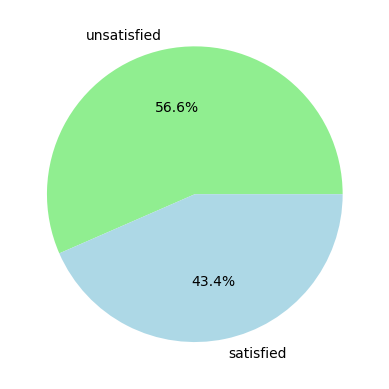

In [412]:
plt.pie(target_data, colors=['lightgreen', 'lightblue'], labels=['unsatisfied', 'satisfied'], autopct='%1.1f%%')

In [413]:
# Lets review the avg. ratings for each column
# Remove the non-rating values
non_rating_cols = ['age', 'flight_distance', 'departure_delay_in_minutes']
ratings = [col for col in numericals if col not in non_rating_cols]

[(col, round(df[col].mean(), 3)) for col in ratings]

[('inflight_wifi_service', 2.729),
 ('departure/arrival_time_convenient', 3.058),
 ('ease_of_online_booking', 2.757),
 ('gate_location', 2.977),
 ('food_and_drink', 3.205),
 ('online_boarding', 3.253),
 ('seat_comfort', 3.441),
 ('inflight_entertainment', 3.358),
 ('on-board_service', 3.383),
 ('leg_room_service', 3.351),
 ('baggage_handling', 3.632),
 ('checkin_service', 3.306),
 ('inflight_service', 3.642),
 ('cleanliness', 3.286)]

The two highest scores are for inflight-service and baggage handling. The rest are close to 3 as averages. 

Lets see distrubution of values for each rating

In [414]:
# Count number of unique values for ratings columns
unique_ratings = {col: df_copy[col].nunique() for col in ratings}
unique_ratings
# all have 6, (0 is for not applicable) except for baggage handling.
# lets remove the '0' values


{'inflight_wifi_service': 6,
 'departure/arrival_time_convenient': 6,
 'ease_of_online_booking': 6,
 'gate_location': 6,
 'food_and_drink': 6,
 'online_boarding': 6,
 'seat_comfort': 6,
 'inflight_entertainment': 6,
 'on-board_service': 6,
 'leg_room_service': 6,
 'baggage_handling': 5,
 'checkin_service': 6,
 'inflight_service': 6,
 'cleanliness': 6}

In [415]:
df_clean = df_copy.copy()

for k, v in unique_ratings.items():
    df_clean = df_clean[(df_clean[k] != 0)]
{col: df_clean[col].nunique() for col in ratings}

{'inflight_wifi_service': 5,
 'departure/arrival_time_convenient': 5,
 'ease_of_online_booking': 5,
 'gate_location': 5,
 'food_and_drink': 5,
 'online_boarding': 5,
 'seat_comfort': 5,
 'inflight_entertainment': 5,
 'on-board_service': 5,
 'leg_room_service': 5,
 'baggage_handling': 5,
 'checkin_service': 5,
 'inflight_service': 5,
 'cleanliness': 5}

inflight_wifi_service


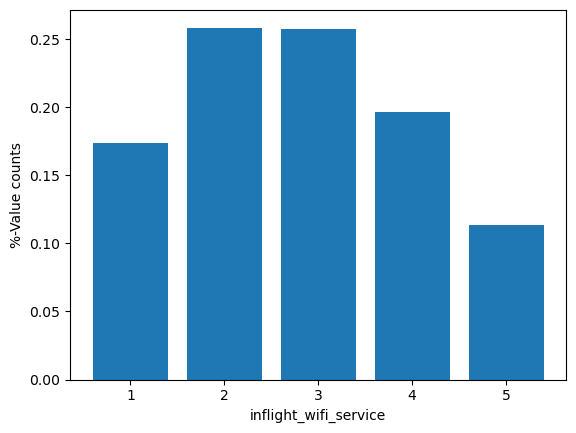

departure/arrival_time_convenient


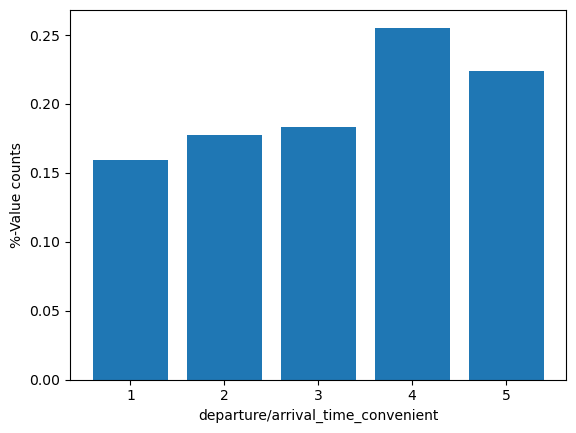

ease_of_online_booking


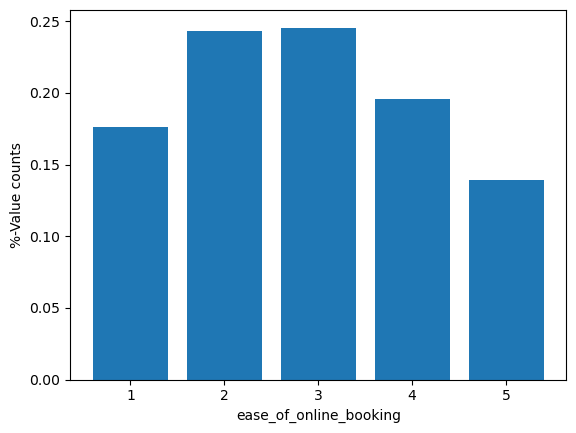

gate_location


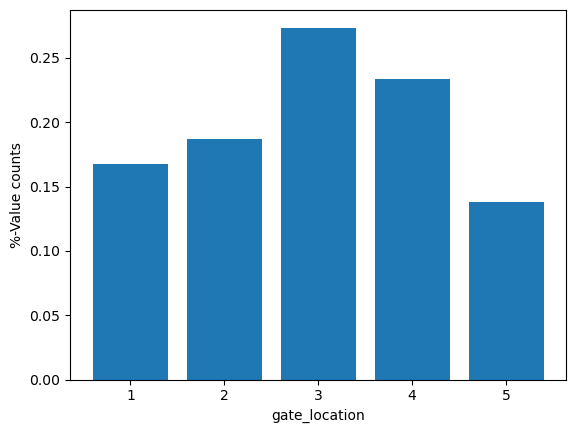

food_and_drink


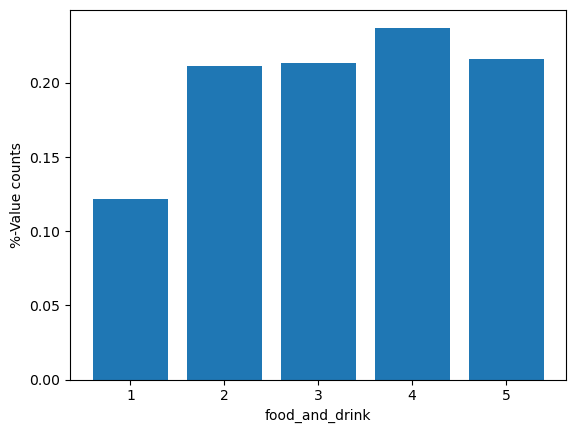

online_boarding


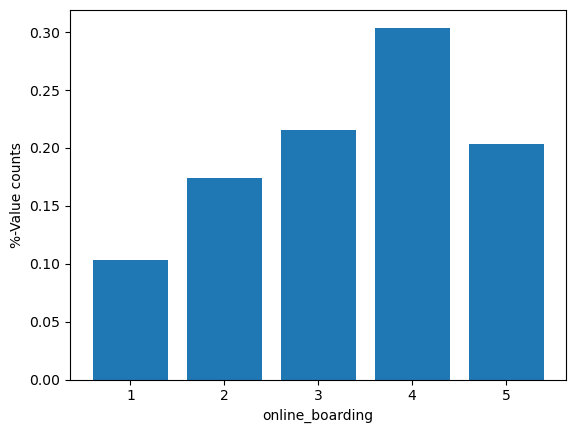

seat_comfort


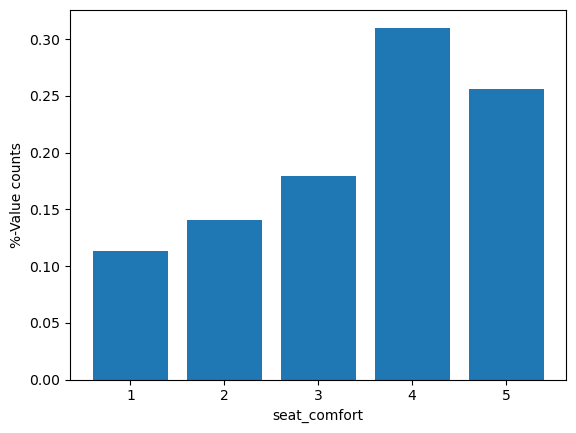

inflight_entertainment


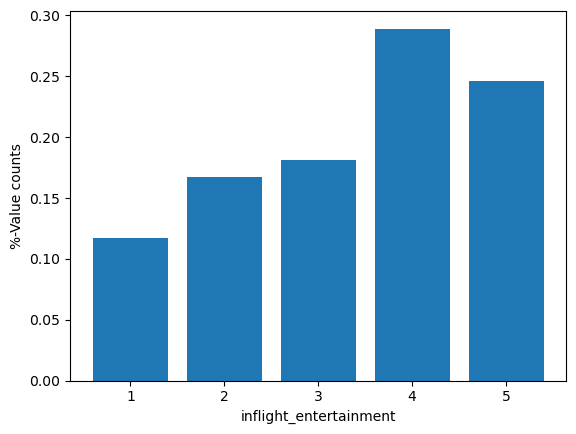

on-board_service


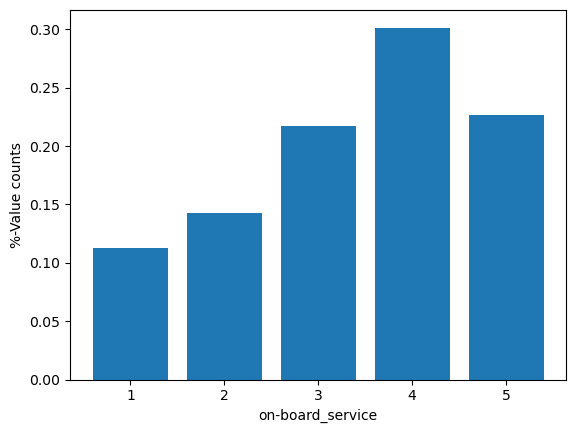

leg_room_service


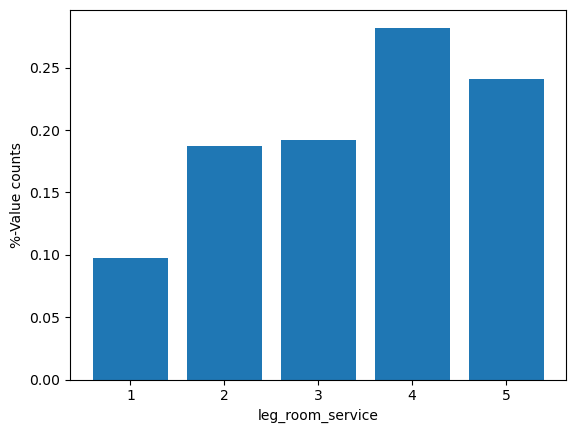

baggage_handling


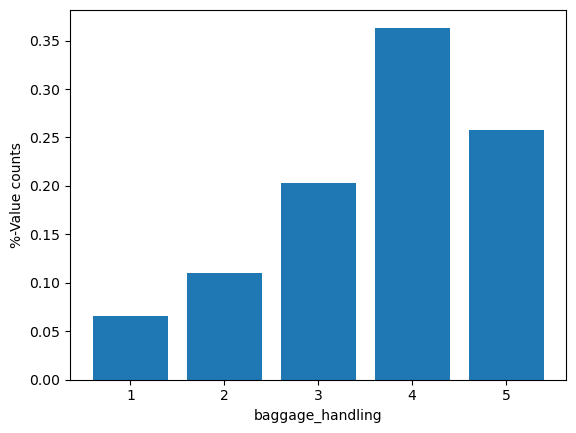

checkin_service


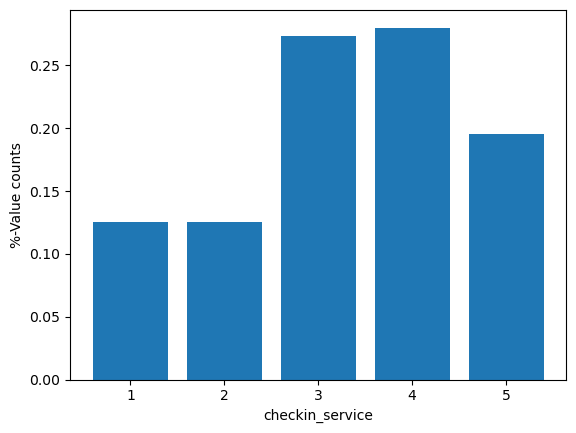

inflight_service


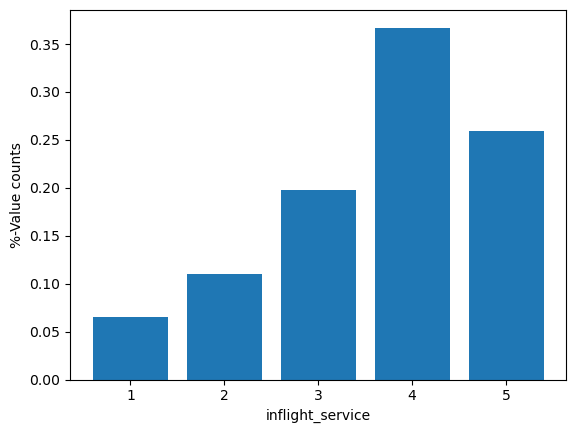

cleanliness


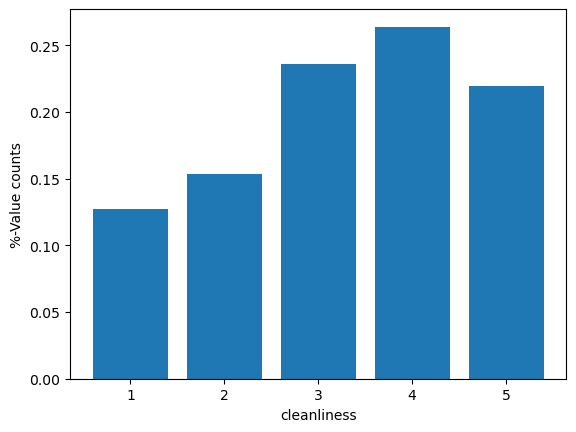

In [416]:
# Some of the ratings have a '0' values for 'Not Applicable'. This is causing noise and should be removed to clean up the model. 
# While plotting the original values, it causes an error because one of the ratings has no '0' values

for rating in ratings:
    print(rating)
    values = df_clean[rating].value_counts(True).sort_index()
    rate = range(1,6)
    plt.bar(rate, values)
    plt.ylabel('%-Value counts')
    plt.xlabel(rating)
    plt.show()
    display()

In [417]:
# Time to train our model now that data is clean
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
import xgboost as xgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc


In [418]:
df_full_train, df_test = train_test_split(df_clean, test_size=0.2, random_state=7)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=7)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
# Let convert the statuses to 1 and 0
# y_train values/Target values == satisfaction
# if satisfied, 1. if unsatisfied, 0
y_train = (df_train.satisfaction == 'satisfied').astype('int').values
y_val = (df_val.satisfaction == 'satisfied').astype('int').values
y_test = (df_test.satisfaction == 'satisfied').astype('int').values
del df_train['satisfaction']
del df_val['satisfaction']
del df_test['satisfaction']

In [419]:
# Decision Tree

In [420]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
features = dv.get_feature_names_out()

In [421]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [422]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = dt.predict(X_val)
roc_auc_score(y_val, y_pred)

0.9439960894386614

In [423]:
y_pred = dt.predict(X_train)
roc_auc_score(y_train, y_pred)

1.0

In [424]:
# Very high prediction score and perfect 1.0 on df_train. Our model is overfit.

In [425]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
roc_auc_score(y_val, y_pred)


0.8682034553082704

In [426]:
y_pred_train = dt.predict(X_train)
roc_auc_score(y_train, y_pred_train)

0.8703599872589614

In [427]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))
# We get some interesting scores when we try a max_depth of [1,2,3,4,5,6,7]. Lets Tune it and map them all out.

|--- online_boarding <= 3.50
|   |--- inflight_wifi_service <= 3.50
|   |   |--- class: 0
|   |--- inflight_wifi_service >  3.50
|   |   |--- class: 1
|--- online_boarding >  3.50
|   |--- type_of_travel=business_travel <= 0.50
|   |   |--- class: 0
|   |--- type_of_travel=business_travel >  0.50
|   |   |--- class: 1



In [428]:
for d in [1 ,2,3,4,5,6,10, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' %(d, auc))

   1 -> 0.803
   2 -> 0.868
   3 -> 0.877
   4 -> 0.884
   5 -> 0.918
   6 -> 0.920
  10 -> 0.943
None -> 0.944


In [429]:
# Show a large jump from 1 to 2. Looks like 2 maybe our best value to avoid overfitting

In [430]:
# Now we will take the depths and iterate over the other parameters


scores = []
for d in [2, 3, 4]:
    for s in [1, 2, 5, 10, 15, 20, 40, 80, 150]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_val)
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, s, round(auc, 4)))

In [431]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
df_scores.sort_values(by='auc', ascending=False)


,max_depth,min_samples_leaf,auc
26,4,150,0.8837
25,4,80,0.8837
24,4,40,0.8837
23,4,20,0.8837
22,4,15,0.8837
21,4,10,0.8837
20,4,5,0.8837
19,4,2,0.8837
18,4,1,0.8837
14,3,20,0.8767


In [432]:
# Now we define the final Model with our values
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=150)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=150)

In [433]:
dt_pred = dt.predict(X_val)
dt_scores  = pd.DataFrame(data = [['Decision Tree',
                            accuracy_score(y_val, dt_pred),
                            balanced_accuracy_score(y_val, dt_pred), 
                            precision_score(y_val, dt_pred),
                            recall_score(y_val, dt_pred), 
                            f1_score(y_val, dt_pred), 
                            roc_auc_score(y_val, dt_pred)]],
                         columns = ['Model Name','Accuracy','Balanced Accuracy','Precision','Recall','F1','ROC AUC'])
dt_scores

,Model Name,Accuracy,Balanced Accuracy,Precision,Recall,F1,ROC AUC
0,Decision Tree,0.892699,0.88369,0.919365,0.821247,0.867541,0.88369


In [434]:
# Lets try a Random Forest Classifier


In [435]:
rf = RandomForestClassifier(n_estimators=1, random_state=7)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1, random_state=7)

In [436]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)


0.9272084182558847

In [437]:
scores = []
for n in range(1, 10, 1):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, round(auc,4)))
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])


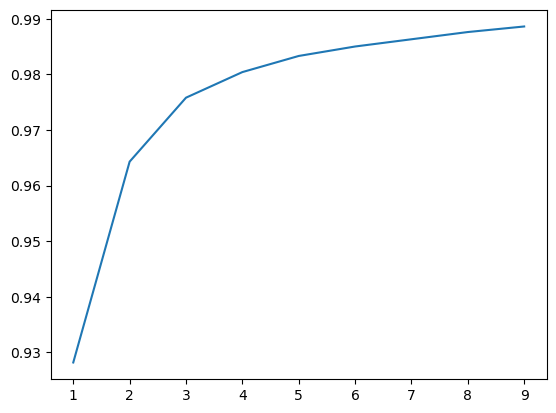

In [438]:
plt.plot(df_scores.n_estimators, df_scores.auc)
# very high success rate. seems like we are overfitting

In [439]:
scores = []
for d in [1, 2, 3, 4]:
    for n in range(1, 5, 1):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, round(auc,4)))

In [440]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])
df_scores.sort_values(by='auc', ascending=False).head()


,max_depth,n_estimators,auc
15,4,4,0.9624
14,4,3,0.9594
11,3,4,0.9549
13,4,2,0.9549
10,3,3,0.9476


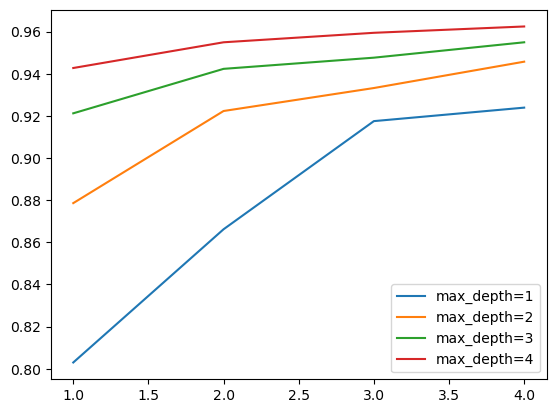

In [441]:
for d in [1, 2, 3, 4]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)
    
plt.legend()

In [442]:
scores = []
max_depth = 2
for s in [1, 3, 5, 10, 50]:
    rf = RandomForestClassifier(n_estimators=2, max_depth=max_depth, min_samples_leaf=s, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((s, round(auc,4)))

In [443]:
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'auc'])
df_scores.sort_values(by='auc', ascending=False).head()

# for s in [1, 3, 5, 10, 50]:
#     df_subset = df_scores[df_scores.min_samples_leaf == s]
#     plt.plot(df_subset.auc, label='min_samples=%s' % s)
    
# plt.legend()

,min_samples_leaf,auc
0,1,0.9223
1,3,0.9223
2,5,0.9223
3,10,0.9223
4,50,0.9223


In [444]:
# values seem stagnant, we will choose middle. min_samples_leaf = 10

In [445]:
rf = RandomForestClassifier(n_estimators=2,
                            max_depth=2,
                            min_samples_leaf=10,
                            random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict_proba(X_val)[:, 1]
satisfied = (rf_pred >= 0.5)
(y_val == satisfied).mean()

0.8589110981015304

In [446]:
df_rf_pred = pd.DataFrame()
df_rf_pred['probability'] = rf_pred
df_rf_pred['prediction'] = satisfied.astype(int)
df_rf_pred['actual'] = y_val
df_rf_pred['correct'] = df_rf_pred.prediction == df_rf_pred.actual
df_rf_pred.head()

,probability,prediction,actual,correct
0,0.468914,0,0,True
1,0.834106,1,1,True
2,0.067119,0,0,True
3,0.834106,1,1,True
4,0.468914,0,0,True


In [447]:
rf_scores  = pd.DataFrame(data = [['Random Forest',
                            accuracy_score(y_val, df_rf_pred['prediction']),
                            balanced_accuracy_score(y_val, df_rf_pred['prediction']), 
                            precision_score(y_val, df_rf_pred['prediction']),
                            recall_score(y_val, df_rf_pred['prediction']), 
                            f1_score(y_val, df_rf_pred['prediction']), 
                            roc_auc_score(y_val, df_rf_pred['prediction'])]],
                         columns = ['Model Name','Accuracy','Balanced Accuracy','Precision','Recall','F1','ROC AUC'])
rf_scores

,Model Name,Accuracy,Balanced Accuracy,Precision,Recall,F1,ROC AUC
0,Random Forest,0.858911,0.850207,0.868472,0.789875,0.827311,0.850207


In [448]:
list(zip(dv.feature_names_, rf.feature_importances_))


[('age', 0.0),
 ('arrival_delay_in_minutes', 0.0),
 ('baggage_handling', 0.0),
 ('checkin_service', 0.0),
 ('class=business', 0.0),
 ('class=eco', 0.0),
 ('class=eco_plus', 0.0),
 ('cleanliness', 0.0),
 ('customer_type=disloyal_customer', 0.0),
 ('customer_type=loyal_customer', 0.0),
 ('departure/arrival_time_convenient', 0.0),
 ('departure_delay_in_minutes', 0.0),
 ('ease_of_online_booking', 0.0),
 ('flight_distance', 0.0),
 ('food_and_drink', 0.0),
 ('gate_location', 0.0),
 ('gender=female', 0.0),
 ('gender=male', 0.0),
 ('inflight_entertainment', 0.21998714630117536),
 ('inflight_service', 0.0),
 ('inflight_wifi_service', 0.05972461964603808),
 ('leg_room_service', 0.06769325558957351),
 ('on-board_service', 0.0),
 ('online_boarding', 0.43450466517111347),
 ('seat_comfort', 0.0),
 ('type_of_travel=business_travel', 0.21809031329209966),
 ('type_of_travel=personal_travel', 0.0)]

In [449]:
# This show that the two most important features are the 1. Type_of_Travel, and 2. Online Boarding

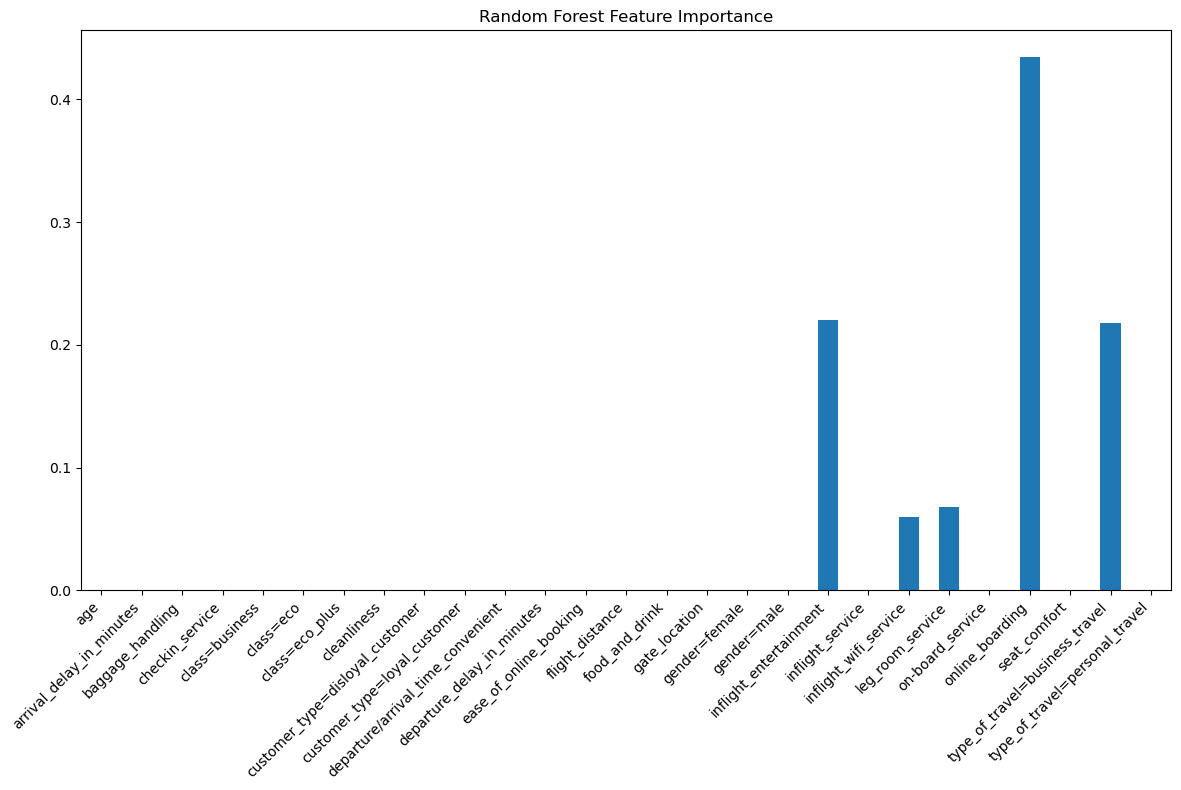

In [450]:
rf_import = pd.Series(rf.feature_importances_, index=dv.feature_names_)
fig, ax = plt.subplots(figsize=(12,8))
rf_import.plot.bar()
ax.set_title("Random Forest Feature Importance")
plt.xticks(rotation=45, ha='right')
fig.tight_layout()

In [451]:
# XGBoost Model

In [452]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [453]:
xgb_params = {
#     the learning rate??/
    'eta': 0.3, 
    'max_depth': 6,
#     similiar to min_samples_leaf
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [454]:
y_pred = model.predict(dval)


In [455]:
roc_auc_score(y_val, y_pred)


0.9899982337842738

In [456]:
watchlist = [(dtrain, 'train'), (dval, 'val')]


In [457]:
def parse_xgb_output(output):
    results = []
    
    for line in output.strip().split('\n'):
        num, train, val = line.split('\t')
        it = int(num.strip('[]'))
        train = float(train.split(':')[1])
        val = float(val.split(':')[1])
        
        results.append((it, train, val))
    
    columns = ['num_of_iterations', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    
    return df_results

        

In [458]:
%%capture output
# this will allow us to capture the output. Line Magics must be at the beginning of the cell

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=200)


In [459]:
output_string = (output.stdout)

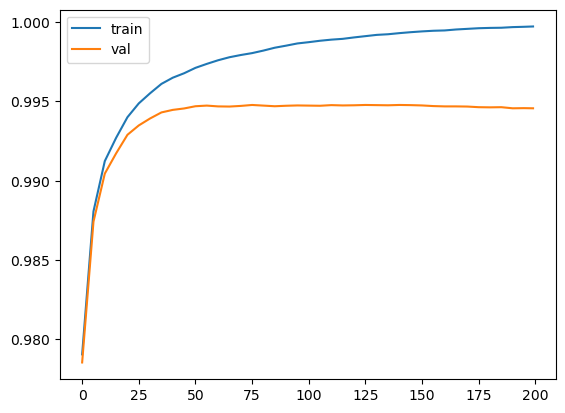

In [460]:
df_score = parse_xgb_output(output_string)
 
plt.plot(df_score.num_of_iterations	, df_score.train_auc, label='train')
plt.plot(df_score.num_of_iterations	, df_score.val_auc, label='val')
plt.legend()

In [461]:
xgb_params1 = {
    'eta': 0.3, 
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [462]:
xgb_params2 = {
    'eta': 0.01, 
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [463]:
xgb_params3 = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

[0]	train-auc:0.93981	val-auc:0.93807
[5]	train-auc:0.96731	val-auc:0.96516
[10]	train-auc:0.97866	val-auc:0.97794
[15]	train-auc:0.98317	val-auc:0.98236
[20]	train-auc:0.98539	val-auc:0.98469
[25]	train-auc:0.98646	val-auc:0.98586
[30]	train-auc:0.98805	val-auc:0.98743
[35]	train-auc:0.98886	val-auc:0.98828
[40]	train-auc:0.98936	val-auc:0.98876
[45]	train-auc:0.99030	val-auc:0.98969
[49]	train-auc:0.99056	val-auc:0.98998


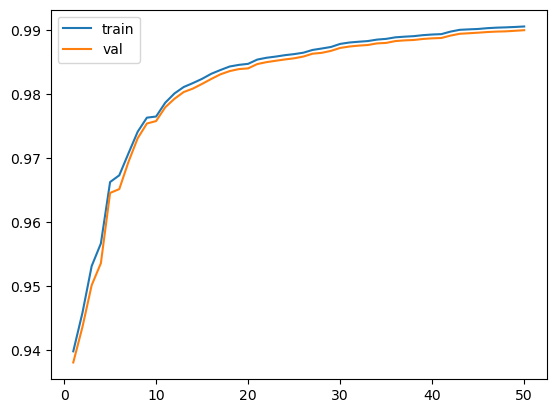

In [464]:
evals_result = {}

model = xgb.train(params=xgb_params1,
                  dtrain=dtrain,
                  num_boost_round=50,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=evals_result)

columns = ['iter', 'train_auc', 'val_auc']
train_aucs = list(evals_result['train'].values())[0]
val_aucs = list(evals_result['val'].values())[0]

df_scores = pd.DataFrame(
    list(zip(
        range(1, len(train_aucs) + 1),
        train_aucs,
        val_aucs
    )), columns=columns)

plt.plot(df_scores.iter, df_scores.train_auc, label='train')
plt.plot(df_scores.iter, df_scores.val_auc, label='val')
plt.legend()

[0]	train-auc:0.93981	val-auc:0.93807
[5]	train-auc:0.93981	val-auc:0.93807
[10]	train-auc:0.93981	val-auc:0.93807
[15]	train-auc:0.93981	val-auc:0.93807
[20]	train-auc:0.93981	val-auc:0.93807
[25]	train-auc:0.94671	val-auc:0.94412
[30]	train-auc:0.94938	val-auc:0.94678
[35]	train-auc:0.95111	val-auc:0.94865
[40]	train-auc:0.95129	val-auc:0.94890
[45]	train-auc:0.95129	val-auc:0.94890
[49]	train-auc:0.95318	val-auc:0.95082


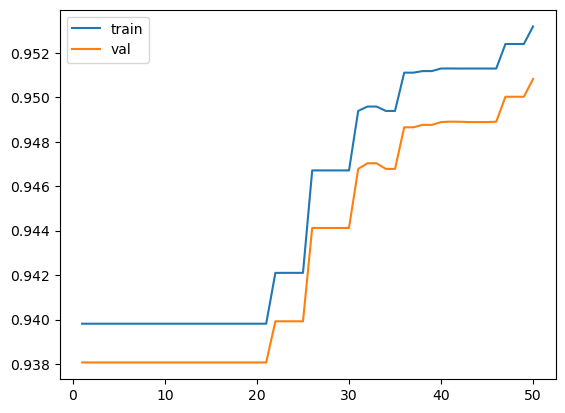

In [465]:
evals_result = {}

model = xgb.train(params=xgb_params2,
                  dtrain=dtrain,
                  num_boost_round=50,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=evals_result)

columns = ['iter', 'train_auc', 'val_auc']
train_aucs = list(evals_result['train'].values())[0]
val_aucs = list(evals_result['val'].values())[0]

df_scores = pd.DataFrame(
    list(zip(
        range(1, len(train_aucs) + 1),
        train_aucs,
        val_aucs
    )), columns=columns)

plt.plot(df_scores.iter, df_scores.train_auc, label='train')
plt.plot(df_scores.iter, df_scores.val_auc, label='val')
plt.legend()

[0]	train-auc:0.93981	val-auc:0.93807
[5]	train-auc:0.95130	val-auc:0.94879
[10]	train-auc:0.95862	val-auc:0.95580
[15]	train-auc:0.96929	val-auc:0.96788
[20]	train-auc:0.97442	val-auc:0.97334
[25]	train-auc:0.97688	val-auc:0.97580
[30]	train-auc:0.97884	val-auc:0.97782
[35]	train-auc:0.98043	val-auc:0.97947
[40]	train-auc:0.98188	val-auc:0.98109
[45]	train-auc:0.98291	val-auc:0.98220
[49]	train-auc:0.98365	val-auc:0.98294


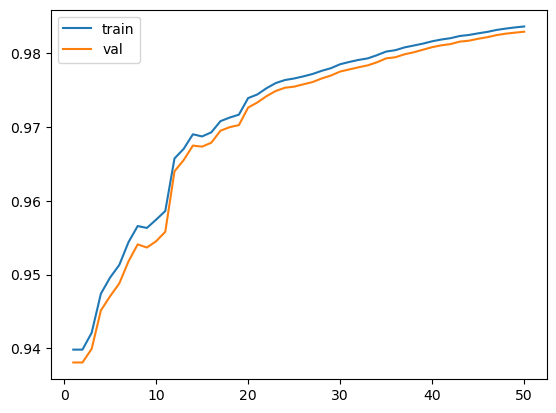

In [466]:
evals_result = {}

model = xgb.train(params=xgb_params3,
                  dtrain=dtrain,
                  num_boost_round=50,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=evals_result)

columns = ['iter', 'train_auc', 'val_auc']
train_aucs = list(evals_result['train'].values())[0]
val_aucs = list(evals_result['val'].values())[0]

df_scores = pd.DataFrame(
    list(zip(
        range(1, len(train_aucs) + 1),
        train_aucs,
        val_aucs
    )), columns=columns)

plt.plot(df_scores.iter, df_scores.train_auc, label='train')
plt.plot(df_scores.iter, df_scores.val_auc, label='val')
plt.legend()

In [467]:
# We will hold ETA at 0.3 and max depth at 3
xgb_params_final = {
    'eta': 0.3, 
    'max_depth': 3,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

[0]	train-auc:0.93981	val-auc:0.93807
[5]	train-auc:0.96731	val-auc:0.96516
[10]	train-auc:0.97866	val-auc:0.97794
[15]	train-auc:0.98317	val-auc:0.98236
[20]	train-auc:0.98539	val-auc:0.98469
[25]	train-auc:0.98646	val-auc:0.98586
[30]	train-auc:0.98805	val-auc:0.98743
[35]	train-auc:0.98886	val-auc:0.98828
[40]	train-auc:0.98936	val-auc:0.98876
[45]	train-auc:0.99030	val-auc:0.98969
[49]	train-auc:0.99056	val-auc:0.98998


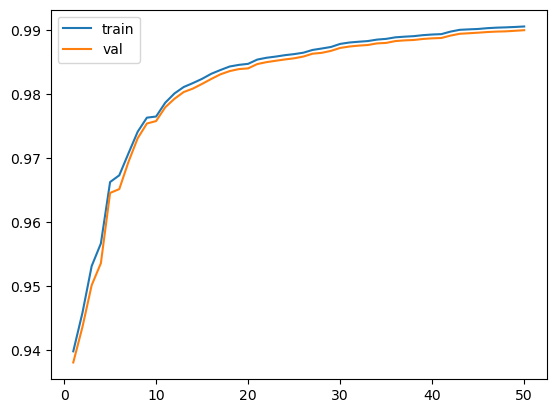

In [468]:
evals_result = {}

model_final = xgb.train(params=xgb_params_final,
                  dtrain=dtrain,
                  num_boost_round=50,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=evals_result)

columns = ['iter', 'train_auc', 'val_auc']
train_aucs = list(evals_result['train'].values())[0]
val_aucs = list(evals_result['val'].values())[0]

df_scores = pd.DataFrame(
    list(zip(
        range(1, len(train_aucs) + 1),
        train_aucs,
        val_aucs
    )), columns=columns)

plt.plot(df_scores.iter, df_scores.train_auc, label='train')
plt.plot(df_scores.iter, df_scores.val_auc, label='val')
plt.legend()

In [469]:
xgb_pred = model_final.predict(dval)
xgb_satisfied = (xgb_pred >= 0.5)

In [470]:
df_xgb_pred = pd.DataFrame()
df_xgb_pred['probability'] = xgb_pred
df_xgb_pred['prediction'] = xgb_satisfied.astype(int)
df_xgb_pred['actual'] = y_val
df_xgb_pred['correct'] = df_xgb_pred.prediction == df_xgb_pred.actual
df_xgb_pred.head()

,probability,prediction,actual,correct
0,0.139845,0,0,True
1,0.999754,1,1,True
2,0.001301,0,0,True
3,0.996301,1,1,True
4,0.153820,0,0,True


In [471]:
xgb_scores  = pd.DataFrame(data = [['XGBoost',
                            accuracy_score(y_val, df_xgb_pred['prediction']),
                            balanced_accuracy_score(y_val, df_xgb_pred['prediction']), 
                            precision_score(y_val, df_xgb_pred['prediction']),
                            recall_score(y_val, df_xgb_pred['prediction']), 
                            f1_score(y_val, df_xgb_pred['prediction']), 
                            roc_auc_score(y_val, df_xgb_pred['prediction'])]],
                         columns = ['Model Name','Accuracy','Balanced Accuracy','Precision','Recall','F1','ROC AUC'])
xgb_scores

,Model Name,Accuracy,Balanced Accuracy,Precision,Recall,F1,ROC AUC
0,XGBoost,0.949904,0.946966,0.954976,0.926603,0.940575,0.946966


In [472]:
# now we choose the best out of our 2 models. Based on our scores, our XGBoost model is the best

In [473]:
model_scores = pd.concat([dt_scores, rf_scores, xgb_scores])
model_scores.sort_values('ROC AUC', ascending=False)

,Model Name,Accuracy,Balanced Accuracy,Precision,Recall,F1,ROC AUC
0,XGBoost,0.949904,0.946966,0.954976,0.926603,0.940575,0.946966
0,Decision Tree,0.892699,0.883690,0.919365,0.821247,0.867541,0.883690
0,Random Forest,0.858911,0.850207,0.868472,0.789875,0.827311,0.850207


In [474]:
y_full_train = (df_full_train.satisfaction == 'satisfied').astype('int').values
del df_full_train['satisfaction']

In [475]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [476]:
features = list(dv.get_feature_names_out())

dfull_train = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, feature_names=features)

In [478]:
xgb_model = xgb.train(params=xgb_params_final,
                  dtrain=dfull_train,
                  num_boost_round=50,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=evals_result)
xgb_pred = xgb_model.predict(dtest)
xgb_satisfied = (xgb_pred >= 0.5)

[0]	train-auc:0.93981	val-auc:0.93807
[5]	train-auc:0.96803	val-auc:0.96665
[10]	train-auc:0.97945	val-auc:0.97853
[15]	train-auc:0.98275	val-auc:0.98225
[20]	train-auc:0.98522	val-auc:0.98477
[25]	train-auc:0.98702	val-auc:0.98667
[30]	train-auc:0.98821	val-auc:0.98784
[35]	train-auc:0.98910	val-auc:0.98884
[40]	train-auc:0.99000	val-auc:0.98979
[45]	train-auc:0.99067	val-auc:0.99049
[49]	train-auc:0.99104	val-auc:0.99091


In [482]:
xgb_f_scores  = pd.DataFrame(data = [['XGBoost (Full Train)',
                            accuracy_score(y_test, xgb_satisfied.astype(int)),
                            balanced_accuracy_score(y_test, xgb_satisfied.astype(int)), 
                            precision_score(y_test, xgb_satisfied.astype(int)),
                            recall_score(y_test, xgb_satisfied.astype(int)), 
                            f1_score(y_test, xgb_satisfied.astype(int)), 
                            roc_auc_score(y_test, xgb_satisfied.astype(int))]],
                         columns = ['Model Name','Accuracy','Balanced Accuracy','Precision','Recall','F1','ROC AUC'])
xgb_f_scores

,Model Name,Accuracy,Balanced Accuracy,Precision,Recall,F1,ROC AUC
0,XGBoost (Full Train),0.951075,0.947623,0.960248,0.923807,0.941675,0.947623


Observations
Overall, our model  perform well on the test dataset. You want the ROC AUC scores to be > .5. If there were more time, I would experiment more.
Conclusion
Sitting in business class and having online boarding seem to be the biggest driver for being your passenger to be satisfied. 